In [1]:
import numpy as np
raw_dat = np.loadtxt('./csv/europe_power_system.csv', delimiter=",")

In [62]:
import pandas as pd
pd.options.display.max_rows = 999
data_frame = pd.read_csv('./csv/europe_power_system.csv', sep=",", index_col=0, parse_dates=True, decimal='.')
data_frame = data_frame.drop(['cet_cest_timestamp'],axis=1).tz_localize(None)
#data_frame.set_index('utc_timestamp', inplace=True)
data_frame.head()# = pd.read_csv('./data/elect/europe.csv', sep=",", decimal='.')
#data_start = (train_data!=0).argmax(axis=0)

,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_transparency,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2004-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for i in data_frame.columns:
    print(i)

AL_load_actual_entsoe_power_statistics
AT_load_actual_entsoe_power_statistics
AT_load_actual_entsoe_transparency
AT_load_forecast_entsoe_transparency
AT_price_day_ahead
AT_solar_generation_actual
AT_wind_onshore_generation_actual
BA_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_transparency
BE_load_forecast_entsoe_transparency
BE_solar_generation_actual
BE_wind_offshore_generation_actual
BE_wind_onshore_capacity
BE_wind_onshore_generation_actual
BE_wind_onshore_profile
BG_load_actual_entsoe_power_statistics
BG_load_actual_entsoe_transparency
BG_load_forecast_entsoe_transparency
BG_solar_generation_actual
BG_wind_onshore_generation_actual
CH_load_actual_entsoe_power_statistics
CH_load_actual_entsoe_transparency
CH_load_forecast_entsoe_transparency
CH_solar_capacity
CH_solar_generation_actual
CH_wind_capacity
CH_wind_onshore_capacity
CH_wind_onshore_generation_actual
CS_load_actual_entsoe_power_statistics
CY_load_actual_entsoe_power_stat

In [63]:
data_frame = data_frame['2015-01-01 00:00:00':'2017-11-30 23:00:00'] #'2018-12-31 23:00:00'

In [64]:
data_frame = data_frame.loc[:,[column for column in data_frame.columns if ('price' in column) or ('generation_actual' in column) and not ('capacity' in column) and not ('profile' in column) or ('load_actual' in column)]] 

In [65]:
total = data_frame.isnull().sum().sort_values(ascending = False)
percent = (data_frame.isnull().sum()/data_frame.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data

,Total,Percent
DE_LU_wind_offshore_generation_actual,25560,100.000000
DE_LU_wind_onshore_generation_actual,25560,100.000000
NL_wind_onshore_generation_actual,25560,100.000000
ME_wind_onshore_generation_actual,25560,100.000000
IE_sem_price_day_ahead,25560,100.000000
GB_GBN_wind_onshore_generation_actual,25560,100.000000
GB_GBN_wind_offshore_generation_actual,25560,100.000000
DK_1_load_actual_entsoe_power_statistics,25560,100.000000
NO_1_wind_onshore_generation_actual,25560,100.000000
SE_price_day_ahead,25560,100.000000


In [66]:
missing__train_data[missing__train_data.Percent<5].shape

(224, 2)

In [67]:
data_frame = data_frame[missing__train_data[missing__train_data.Percent<5].index]

In [68]:
data_frame = data_frame.resample('1H').mean().interpolate(method='linear')

In [69]:
avgs = data_frame.loc['2015-01-01 00:00:00':'2015-12-31 23:00:00',:].median()

In [70]:
data_frame.fillna(method='bfill', inplace=True)

In [71]:
total = data_frame.isnull().sum().sort_values(ascending = False)
percent = (data_frame.isnull().sum()/data_frame.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data

,Total,Percent
HR_load_actual_entsoe_transparency,0,0.0
NO_1_price_day_ahead,0,0.0
NO_3_price_day_ahead,0,0.0
LV_load_actual_entsoe_transparency,0,0.0
GR_load_actual_entsoe_transparency,0,0.0
LV_wind_onshore_generation_actual,0,0.0
GB_UKM_wind_offshore_generation_actual,0,0.0
BG_load_actual_entsoe_transparency,0,0.0
IT_NORD_solar_generation_actual,0,0.0
GB_UKM_solar_generation_actual,0,0.0


In [72]:
duplicates = ['DK_1_load_actual_entsoe_transparency',
            'DK_1_load_actual_net_consumption_tso', 
            'DK_2_load_actual_entsoe_transparency',
            'DK_2_load_actual_net_consumption_tso', 
            'AT_load_actual_entsoe_transparency',
            'BE_load_actual_entsoe_transparency',
            'BG_load_actual_entsoe_power_statistics',
            'CH_load_actual_entsoe_transparency',
            'CZ_load_actual_entsoe_transparency',
            'DE_load_actual_entsoe_transparency',
            'DK_load_actual_entsoe_transparency',
            'EE_load_actual_entsoe_transparency',
            'ES_load_actual_entsoe_transparency',
            'FI_load_actual_entsoe_transparency',
            'FR_load_actual_entsoe_power_statistics',
            'FR_load_actual_entsoe_transparency',
            'GB_GBN_load_actual_entsoe_transparency',
            'GB_GBN_load_actual_gross_generation_tso',
            'GR_load_actual_entsoe_transparency',
              'HR_load_actual_entsoe_transparency',
              'HU_load_actual_entsoe_transparency',
              'IE_load_actual_entsoe_transparency',
              'IT_load_actual_entsoe_transparency',
              'LT_load_actual_entsoe_transparency',
              'LU_load_actual_entsoe_transparency',
              'LV_load_actual_entsoe_transparency',
              'ME_load_actual_entsoe_transparency',
              'NL_load_actual_entsoe_power_statistics',
              'NO_load_actual_entsoe_transparency',
              'PL_load_actual_entsoe_transparency',
              'PT_load_actual_entsoe_transparency',
              'RO_load_actual_entsoe_transparency',
              'RS_load_actual_entsoe_transparency',
              'SI_load_actual_entsoe_transparency',
              'SK_load_actual_entsoe_transparency',
              'SE_load_actual_entsoe_transparency',
              'SE_load_actual_tso'
             ]

In [56]:
data_frame = data_frame[data_frame.columns[~data_frame.columns.isin(duplicates)]]

In [57]:
data_frame.drop('IT_SACO_DC_price_day_ahead', axis=1,inplace=True)
data_frame.drop(['GB_GBN_solar_generation_actual_dso','GB_GBN_solar_generation_actual_tso'],
              axis=1,inplace=True)

In [84]:
data_frame.reset_index().to_csv('./data/elect/europe_processed_grouped.csv',index=False)

In [60]:
data_frame.head()

,LT_solar_generation_actual,LT_wind_onshore_generation_actual,NL_solar_generation_actual,NO_2_load_actual_entsoe_transparency,NO_3_load_actual_entsoe_transparency,NO_1_load_actual_entsoe_transparency,NO_4_load_actual_entsoe_transparency,NO_5_load_actual_entsoe_transparency,SK_solar_generation_actual,BE_wind_offshore_generation_actual,...,DK_1_wind_generation_actual,DK_1_wind_offshore_generation_actual,DK_1_wind_onshore_generation_actual,DK_2_load_actual_tso,DK_2_solar_generation_actual,DK_2_wind_generation_actual,DK_2_wind_offshore_generation_actual,DK_2_wind_onshore_generation_actual,DK_energinet_load_actual_entsoe_transparency,NO_1_price_day_ahead
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0,256.0,40.0,4138.83,2370.48,4659.40,2090.94,2211.13,3.8,492.51,...,1832.1,629.14,1203.56,1385.9,0.0,632.4,347.50,282.00,3210.98,27.07
2015-01-01 01:00:00,0.0,256.0,40.0,4038.69,2307.45,4552.10,2078.44,2128.31,3.8,519.80,...,1766.6,567.07,1206.98,1326.5,0.0,585.1,335.64,247.64,3100.02,26.93
2015-01-01 02:00:00,0.0,256.0,40.0,3955.79,2272.86,4469.26,2037.06,2147.59,3.8,532.52,...,1885.5,549.83,1352.40,1262.5,0.0,495.5,281.04,204.08,2980.39,26.83
2015-01-01 03:00:00,0.0,256.0,40.0,3900.05,2285.79,4442.35,2012.77,2114.13,3.8,412.29,...,2133.6,660.47,1463.50,1228.2,0.0,492.0,254.96,215.54,2933.49,26.81
2015-01-01 04:00:00,0.0,256.0,40.0,3914.78,2333.07,4487.52,2036.84,2130.82,3.8,413.86,...,2543.6,743.59,1781.53,1232.5,0.0,590.6,312.69,254.20,2941.54,26.97


In [61]:
data_frame.describe()

,LT_solar_generation_actual,LT_wind_onshore_generation_actual,NL_solar_generation_actual,NO_2_load_actual_entsoe_transparency,NO_3_load_actual_entsoe_transparency,NO_1_load_actual_entsoe_transparency,NO_4_load_actual_entsoe_transparency,NO_5_load_actual_entsoe_transparency,SK_solar_generation_actual,BE_wind_offshore_generation_actual,...,DK_1_wind_generation_actual,DK_1_wind_offshore_generation_actual,DK_1_wind_onshore_generation_actual,DK_2_load_actual_tso,DK_2_solar_generation_actual,DK_2_wind_generation_actual,DK_2_wind_offshore_generation_actual,DK_2_wind_onshore_generation_actual,DK_energinet_load_actual_entsoe_transparency,NO_1_price_day_ahead
count,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,...,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000
mean,7.338498,107.326702,169.950861,3974.496419,2765.359898,4052.698217,2152.578999,1921.362392,60.825505,287.063813,...,1238.734658,384.665067,801.030720,1522.112658,27.290786,326.434529,158.631684,152.137364,3698.585111,24.843922
std,10.882786,99.104539,277.116765,749.602688,447.961265,1292.548341,359.406588,437.972835,92.514384,247.766389,...,927.369476,257.059555,661.775134,315.068633,44.972014,277.176186,134.439487,137.478928,749.153458,8.801140
min,0.000000,0.000000,0.000000,2490.430000,855.610000,1755.070000,773.500000,829.410000,0.000000,0.000000,...,0.100000,0.000000,0.000000,882.500000,0.000000,0.000000,0.000000,0.000000,2099.740000,1.030000
25%,0.000000,26.000000,0.000000,3385.557500,2427.300000,3007.645000,1855.160000,1587.755000,0.000000,60.587500,...,441.900000,144.325000,253.657500,1272.875000,0.000000,81.000000,34.312500,38.967500,3073.842500,21.130000
50%,1.000000,76.000000,8.000000,3872.315000,2726.990000,3848.335000,2124.120000,1888.560000,3.183350,217.310000,...,1045.050000,373.815000,614.345000,1521.000000,1.000000,246.550000,120.300000,105.935000,3658.320000,24.960000
75%,12.000000,165.000000,244.000000,4506.370000,3085.587500,4995.830000,2421.887500,2194.532500,97.800000,517.445000,...,1904.125000,617.587500,1226.132500,1748.425000,38.000000,547.850000,291.042500,236.847500,4308.057500,29.080000
max,48.000000,418.000000,1580.000000,11761.260000,5603.160000,8132.470000,4653.790000,6062.370000,387.200000,1271.270000,...,4098.800000,826.860000,6313.410000,2444.200000,222.000000,1393.300000,415.240000,660.130000,8607.380000,214.250000


In [243]:
data_frame[data_frame['DK_energinet_solar_generation_actual'].isna()]['DK_energinet_solar_generation_actual']

Series([], Freq: H, Name: DK_energinet_solar_generation_actual, dtype: float64)

In [76]:
for i in data_frame.columns:
    #if 'power_statistics' or 'transparency' in data_frame[i].values[0]:
    print(i)

BE_wind_offshore_generation_actual
GB_GBN_solar_generation_actual_dso
GB_GBN_solar_generation_actual
GB_GBN_load_actual_tso
GB_GBN_wind_generation_actual
GB_GBN_wind_generation_actual_dso
GB_GBN_load_actual_gross_generation_tso
GB_EAW_load_actual_tso
SK_solar_generation_actual
NO_4_load_actual_entsoe_transparency
NO_5_load_actual_entsoe_transparency
NO_3_load_actual_entsoe_transparency
NO_2_load_actual_entsoe_transparency
NO_1_load_actual_entsoe_transparency
LU_load_actual_entsoe_transparency
ME_load_actual_entsoe_transparency
IE_load_actual_entsoe_transparency
LT_load_actual_entsoe_transparency
CH_wind_onshore_generation_actual
CH_solar_generation_actual
NO_load_actual_entsoe_transparency
IT_FOGN_price_day_ahead
NO_2_wind_onshore_generation_actual
NO_4_wind_onshore_generation_actual
NO_3_wind_onshore_generation_actual
NO_wind_onshore_generation_actual
IT_SACO_DC_price_day_ahead
RO_load_actual_entsoe_transparency
IT_NORD_price_day_ahead
RO_solar_generation_actual
IT_PRGP_price_day_ahea

In [77]:
len(data_frame.columns)

207

In [73]:
load_df = data_frame.loc[:,[column for column in data_frame.columns if ('load_actual' in column)]] 
load_df.head()

,RS_load_actual_entsoe_transparency,NO_2_load_actual_entsoe_transparency,NO_3_load_actual_entsoe_transparency,NO_1_load_actual_entsoe_transparency,NO_4_load_actual_entsoe_transparency,NO_5_load_actual_entsoe_transparency,IE_load_actual_entsoe_transparency,ME_load_actual_entsoe_transparency,NO_load_actual_entsoe_transparency,RO_load_actual_entsoe_transparency,...,NO_load_actual_entsoe_power_statistics,SI_load_actual_entsoe_transparency,DK_1_load_actual_entsoe_transparency,DK_1_load_actual_net_consumption_tso,DK_1_load_actual_tso,DK_2_load_actual_entsoe_transparency,DK_2_load_actual_net_consumption_tso,DK_2_load_actual_tso,DK_energinet_load_actual_entsoe_transparency,HR_load_actual_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,5614.0,4138.83,2370.48,4659.40,2090.94,2211.13,2832.0,483.01,15470.78,6626.95,...,15471.0,1086.87,1842.66,1735.7,1837.3,1368.32,1336.3,1385.9,3210.98,1948.0
2015-01-01 01:00:00,5614.0,4038.69,2307.45,4552.10,2078.44,2128.31,2678.0,452.52,15104.99,6626.95,...,15105.0,1045.47,1794.96,1653.8,1764.2,1305.06,1282.6,1326.5,3100.02,1812.0
2015-01-01 02:00:00,5614.0,3955.79,2272.86,4469.26,2037.06,2147.59,2432.0,416.46,14882.56,6626.95,...,14883.0,1004.79,1744.76,1581.8,1690.9,1235.63,1222.0,1262.5,2980.39,1712.0
2015-01-01 03:00:00,5614.0,3900.05,2285.79,4442.35,2012.77,2114.13,2276.0,399.46,14755.09,6626.95,...,14755.0,983.79,1743.17,1542.7,1660.5,1190.32,1187.9,1228.2,2933.49,1646.0
2015-01-01 04:00:00,5614.0,3914.78,2333.07,4487.52,2036.84,2130.82,2173.0,393.89,14903.03,6626.95,...,14903.0,998.67,1751.47,1562.5,1684.2,1190.07,1189.1,1232.5,2941.54,1657.0


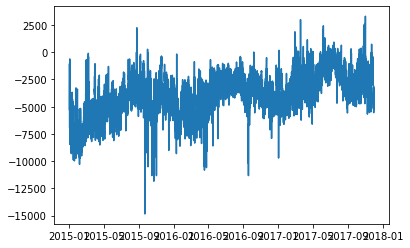

In [16]:
import matplotlib.pyplot as plt
plt.plot(load_df['DE_load_actual_entsoe_transparency']-load_df['DE_load_actual_entsoe_power_statistics'])

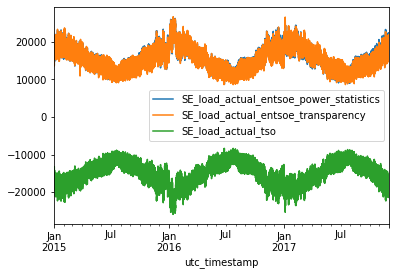

In [18]:
load_df[['SE_load_actual_entsoe_power_statistics',
'SE_load_actual_entsoe_transparency',
'SE_load_actual_tso'
        ]].plot()

In [319]:
# zones = list(load_df.columns)
# ['_'.join(i.split('_')[:2]) for i in zones]

In [274]:
# import numpy
# x = numpy.array(load_df.columns.str.split('_')[:][:])#.title()
# x[:]

In [74]:
load_df = load_df[load_df.columns[~load_df.columns.isin(duplicates)]]

In [76]:
load_df.head()

,NO_2_load_actual_entsoe_transparency,NO_3_load_actual_entsoe_transparency,NO_1_load_actual_entsoe_transparency,NO_4_load_actual_entsoe_transparency,NO_5_load_actual_entsoe_transparency,GR_load_actual_entsoe_power_statistics,SE_4_load_actual_entsoe_transparency,SE_3_load_actual_entsoe_transparency,SE_1_load_actual_entsoe_transparency,SE_2_load_actual_entsoe_transparency,...,HU_load_actual_entsoe_power_statistics,SI_load_actual_entsoe_power_statistics,HR_load_actual_entsoe_power_statistics,IT_load_actual_entsoe_power_statistics,DE_transnetbw_load_actual_entsoe_transparency,PL_load_actual_entsoe_power_statistics,NO_load_actual_entsoe_power_statistics,DK_1_load_actual_tso,DK_2_load_actual_tso,DK_energinet_load_actual_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4138.83,2370.48,4659.40,2090.94,2211.13,5537.0,2267.0,9520.0,1120.0,1819.0,...,3966.0,1194.0,1954.0,25056.0,5327.0,13726.0,15471.0,1837.3,1385.9,3210.98
2015-01-01 01:00:00,4038.69,2307.45,4552.10,2078.44,2128.31,5227.0,2281.0,9277.0,1092.0,1835.0,...,3653.0,1153.0,1818.0,23342.0,5087.0,13036.0,15105.0,1764.2,1326.5,3100.02
2015-01-01 02:00:00,3955.79,2272.86,4469.26,2037.06,2147.59,4977.0,2313.0,9132.0,1059.0,1794.0,...,3406.0,1113.0,1813.0,21868.0,4906.0,12555.0,14883.0,1690.9,1262.5,2980.39
2015-01-01 03:00:00,3900.05,2285.79,4442.35,2012.77,2114.13,4876.0,2372.0,9083.0,1019.0,1775.0,...,3324.0,1091.0,1776.0,20985.0,4865.0,12427.0,14755.0,1660.5,1228.2,2933.49
2015-01-01 04:00:00,3914.78,2333.07,4487.52,2036.84,2130.82,4906.0,2424.0,9102.0,990.0,1752.0,...,3334.0,1107.0,1787.0,20976.0,4685.0,12306.0,14903.0,1684.2,1232.5,2941.54


In [24]:
import numpy
for i in numpy.sort(load_df.columns):
    print(i)

AT_load_actual_entsoe_power_statistics
BA_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_power_statistics
BG_load_actual_entsoe_transparency
CH_load_actual_entsoe_power_statistics
CY_load_actual_entsoe_power_statistics
CZ_load_actual_entsoe_power_statistics
DE_50hertz_load_actual_entsoe_transparency
DE_AT_LU_load_actual_entsoe_transparency
DE_amprion_load_actual_entsoe_transparency
DE_load_actual_entsoe_power_statistics
DE_tennet_load_actual_entsoe_transparency
DE_transnetbw_load_actual_entsoe_transparency
DK_1_load_actual_tso
DK_2_load_actual_tso
DK_energinet_load_actual_entsoe_transparency
DK_load_actual_entsoe_power_statistics
EE_load_actual_entsoe_power_statistics
ES_load_actual_entsoe_power_statistics
FI_load_actual_entsoe_power_statistics
FR_load_actual_tso
GB_EAW_load_actual_tso
GB_GBN_load_actual_tso
GB_UKM_load_actual_entsoe_power_statistics
GR_load_actual_entsoe_power_statistics
HR_load_actual_entsoe_power_statistics
HU_load_actual_entsoe_power_statistics
IE_load_a

In [75]:
price_df = data_frame.loc[:,[column for column in data_frame.columns if ('price' in column)]] 
price_df.drop('IT_SACO_DC_price_day_ahead', axis=1,inplace=True)
price_df.head()

,IT_NORD_CH_price_day_ahead,IT_GR_price_day_ahead,DE_AT_LU_price_day_ahead,IT_FOGN_price_day_ahead,IT_SARD_price_day_ahead,IT_NORD_FR_price_day_ahead,IT_NORD_SI_price_day_ahead,IT_SACO_AC_price_day_ahead,IT_CSUD_price_day_ahead,IT_SICI_price_day_ahead,...,SE_3_price_day_ahead,DK_1_price_day_ahead,DE_price_day_ahead,SE_4_price_day_ahead,NO_2_price_day_ahead,DK_2_price_day_ahead,SE_1_price_day_ahead,NO_5_price_day_ahead,NO_4_price_day_ahead,NO_1_price_day_ahead
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,39.1,39.1,30.57,39.1,39.1,39.1,39.1,39.1,39.1,39.1,...,23.37,18.29,18.29,23.37,27.07,18.29,23.37,27.07,28.05,27.07
2015-01-01 01:00:00,39.1,39.1,30.57,39.1,39.1,39.1,39.1,39.1,39.1,39.1,...,19.33,16.04,16.04,19.33,26.93,16.04,19.33,26.93,27.98,26.93
2015-01-01 02:00:00,39.1,39.1,30.57,39.1,39.1,39.1,39.1,39.1,39.1,39.1,...,17.66,14.60,14.60,17.66,26.83,14.60,17.66,26.83,27.94,26.83
2015-01-01 03:00:00,39.1,39.1,30.57,39.1,39.1,39.1,39.1,39.1,39.1,39.1,...,17.53,14.95,14.95,17.53,26.81,14.95,17.53,26.81,27.95,26.81
2015-01-01 04:00:00,39.1,39.1,30.57,39.1,39.1,39.1,39.1,39.1,39.1,39.1,...,18.07,14.50,14.50,18.07,26.97,14.50,18.07,26.97,28.07,26.97


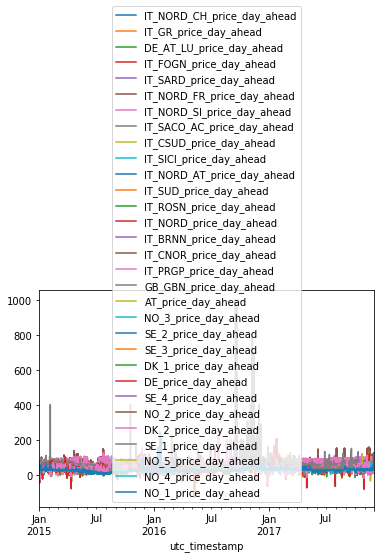

In [28]:
price_df.plot()

In [77]:
for i in price_df.columns:
    print(i)

IT_NORD_CH_price_day_ahead
IT_GR_price_day_ahead
DE_AT_LU_price_day_ahead
IT_FOGN_price_day_ahead
IT_SARD_price_day_ahead
IT_NORD_FR_price_day_ahead
IT_NORD_SI_price_day_ahead
IT_SACO_AC_price_day_ahead
IT_CSUD_price_day_ahead
IT_SICI_price_day_ahead
IT_NORD_AT_price_day_ahead
IT_SUD_price_day_ahead
IT_ROSN_price_day_ahead
IT_NORD_price_day_ahead
IT_BRNN_price_day_ahead
IT_CNOR_price_day_ahead
IT_PRGP_price_day_ahead
GB_GBN_price_day_ahead
AT_price_day_ahead
NO_3_price_day_ahead
SE_2_price_day_ahead
SE_3_price_day_ahead
DK_1_price_day_ahead
DE_price_day_ahead
SE_4_price_day_ahead
NO_2_price_day_ahead
DK_2_price_day_ahead
SE_1_price_day_ahead
NO_5_price_day_ahead
NO_4_price_day_ahead
NO_1_price_day_ahead


In [78]:
wind_df = data_frame.loc[:,[column for column in data_frame.columns if ('wind' in column)]]
wind_df.head()

,LT_wind_onshore_generation_actual,BE_wind_offshore_generation_actual,CH_wind_onshore_generation_actual,NO_3_wind_onshore_generation_actual,NO_4_wind_onshore_generation_actual,NO_wind_onshore_generation_actual,NO_2_wind_onshore_generation_actual,RO_wind_onshore_generation_actual,SE_4_wind_onshore_generation_actual,SE_2_wind_onshore_generation_actual,...,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_onshore_generation_actual,DK_wind_offshore_generation_actual,DK_wind_onshore_generation_actual,DK_1_wind_generation_actual,DK_1_wind_offshore_generation_actual,DK_1_wind_onshore_generation_actual,DK_2_wind_generation_actual,DK_2_wind_offshore_generation_actual,DK_2_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,256.0,492.51,13.58,258.57,65.53,498.20,155.5,752.8,576.0,760.0,...,5.0,5.0,976.7,1487.8,1832.1,629.14,1203.56,632.4,347.50,282.00
2015-01-01 01:00:00,256.0,519.80,14.00,233.53,68.67,479.40,158.6,752.8,576.0,760.0,...,7.0,7.0,903.3,1448.4,1766.6,567.07,1206.98,585.1,335.64,247.64
2015-01-01 02:00:00,256.0,532.52,12.80,200.27,54.67,422.74,149.2,752.8,576.0,760.0,...,8.0,8.0,831.6,1549.4,1885.5,549.83,1352.40,495.5,281.04,204.08
2015-01-01 03:00:00,256.0,412.29,13.73,192.22,54.03,408.35,143.5,752.8,576.0,760.0,...,11.0,11.0,915.8,1709.8,2133.6,660.47,1463.50,492.0,254.96,215.54
2015-01-01 04:00:00,256.0,413.86,10.12,192.10,56.14,415.94,149.1,752.8,576.0,760.0,...,6.0,6.0,1055.9,2078.3,2543.6,743.59,1781.53,590.6,312.69,254.20


In [31]:
for i in numpy.sort(wind_df.columns):
    print(i)

AT_wind_onshore_generation_actual
BE_wind_offshore_generation_actual
BG_wind_onshore_generation_actual
CH_wind_onshore_generation_actual
CZ_wind_onshore_generation_actual
DE_50hertz_wind_generation_actual
DE_50hertz_wind_onshore_generation_actual
DE_AT_LU_wind_offshore_generation_actual
DE_AT_LU_wind_onshore_generation_actual
DE_amprion_wind_generation_actual
DE_amprion_wind_onshore_generation_actual
DE_tennet_wind_generation_actual
DE_tennet_wind_offshore_generation_actual
DE_tennet_wind_onshore_generation_actual
DE_transnetbw_wind_generation_actual
DE_transnetbw_wind_onshore_generation_actual
DE_wind_generation_actual
DE_wind_onshore_generation_actual
DK_1_wind_generation_actual
DK_1_wind_offshore_generation_actual
DK_1_wind_onshore_generation_actual
DK_2_wind_generation_actual
DK_2_wind_offshore_generation_actual
DK_2_wind_onshore_generation_actual
DK_energinet_wind_offshore_generation_actual
DK_energinet_wind_onshore_generation_actual
DK_wind_offshore_generation_actual
DK_wind_onsh

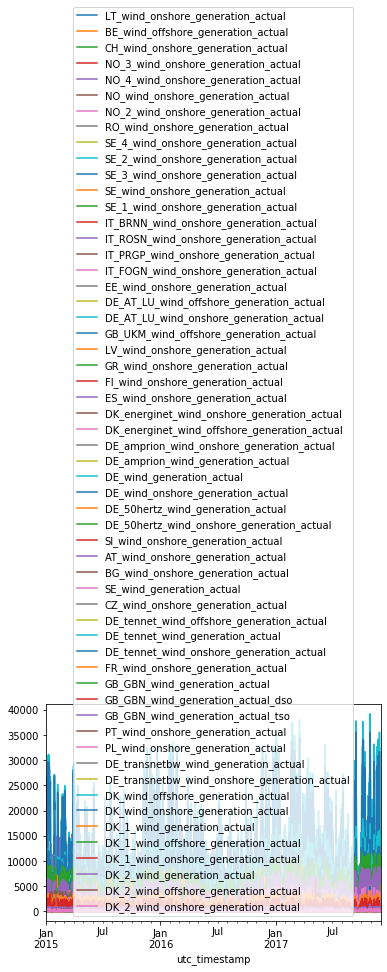

In [366]:
wind_df.plot()

In [79]:
solar_df = data_frame.loc[:,[column for column in data_frame.columns if ('solar' in column)]]
solar_df.drop(['GB_GBN_solar_generation_actual_dso','GB_GBN_solar_generation_actual_tso'],
              axis=1,inplace=True)
solar_df.head()

,LT_solar_generation_actual,NL_solar_generation_actual,SK_solar_generation_actual,CH_solar_generation_actual,RO_solar_generation_actual,DE_AT_LU_solar_generation_actual,IT_FOGN_solar_generation_actual,IT_ROSN_solar_generation_actual,IT_PRGP_solar_generation_actual,EE_solar_generation_actual,...,SI_solar_generation_actual,BE_solar_generation_actual,SE_solar_generation_actual,CZ_solar_generation_actual,FR_solar_generation_actual,GB_GBN_solar_generation_actual,PT_solar_generation_actual,DE_transnetbw_solar_generation_actual,DK_1_solar_generation_actual,DK_2_solar_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0,40.0,3.8,0.03,92.19,73.0,1.0,22.0,7.0,0.1,...,0.0,0.0,0.0102,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,40.0,3.8,0.05,92.19,73.0,1.0,22.0,7.0,0.1,...,0.0,0.0,0.0090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,0.0,40.0,3.8,0.07,92.19,73.0,1.0,22.0,7.0,0.1,...,0.0,0.0,0.0071,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,0.0,40.0,3.8,0.07,92.19,73.0,1.0,22.0,7.0,0.1,...,0.0,0.0,0.0124,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,0.0,40.0,3.8,0.07,92.19,73.0,1.0,22.0,7.0,0.1,...,0.0,0.0,0.0134,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
for i in numpy.sort(solar_df.columns):
    print(i)

AT_solar_generation_actual
BE_solar_generation_actual
BG_solar_generation_actual
CH_solar_generation_actual
CZ_solar_generation_actual
DE_50hertz_solar_generation_actual
DE_AT_LU_solar_generation_actual
DE_amprion_solar_generation_actual
DE_solar_generation_actual
DE_tennet_solar_generation_actual
DE_transnetbw_solar_generation_actual
DK_1_solar_generation_actual
DK_2_solar_generation_actual
DK_energinet_solar_generation_actual
DK_solar_generation_actual
EE_solar_generation_actual
ES_solar_generation_actual
FR_solar_generation_actual
GB_GBN_solar_generation_actual
GB_UKM_solar_generation_actual
GR_solar_generation_actual
IT_CNOR_solar_generation_actual
IT_CSUD_solar_generation_actual
IT_FOGN_solar_generation_actual
IT_NORD_solar_generation_actual
IT_PRGP_solar_generation_actual
IT_ROSN_solar_generation_actual
IT_SARD_solar_generation_actual
IT_SICI_solar_generation_actual
IT_SUD_solar_generation_actual
LT_solar_generation_actual
NL_solar_generation_actual
PT_solar_generation_actual
RO_

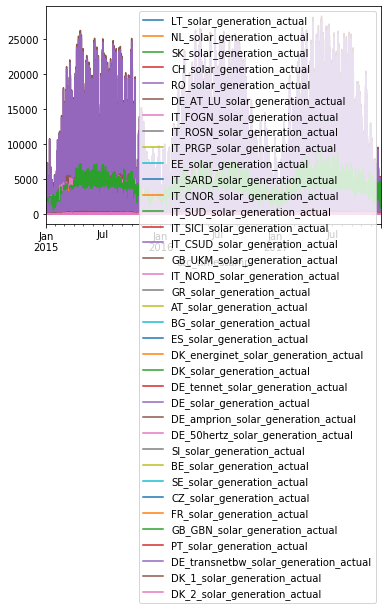

In [34]:
solar_df.plot()

In [81]:
data_frame = pd.concat([load_df,price_df,wind_df, solar_df], join='inner', axis=1)

In [82]:
data_frame.describe()

,NO_2_load_actual_entsoe_transparency,NO_3_load_actual_entsoe_transparency,NO_1_load_actual_entsoe_transparency,NO_4_load_actual_entsoe_transparency,NO_5_load_actual_entsoe_transparency,GR_load_actual_entsoe_power_statistics,SE_4_load_actual_entsoe_transparency,SE_3_load_actual_entsoe_transparency,SE_1_load_actual_entsoe_transparency,SE_2_load_actual_entsoe_transparency,...,SI_solar_generation_actual,BE_solar_generation_actual,SE_solar_generation_actual,CZ_solar_generation_actual,FR_solar_generation_actual,GB_GBN_solar_generation_actual,PT_solar_generation_actual,DE_transnetbw_solar_generation_actual,DK_1_solar_generation_actual,DK_2_solar_generation_actual
count,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,...,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000
mean,3974.496419,2765.359898,4052.698217,2152.578999,1921.362392,5864.700020,2745.440454,9820.047281,1089.335642,1885.671987,...,34.219859,345.056250,6.212422,251.051260,949.558725,1416.142254,91.498435,610.904734,55.811581,27.290786
std,749.602688,447.961265,1292.548341,359.406588,437.972835,1121.757598,657.000356,2140.173095,189.303392,381.897636,...,51.741452,535.378885,12.318820,392.027355,1333.564201,1731.515634,121.113673,947.867552,89.974403,44.972014
min,2490.430000,855.610000,1755.070000,773.500000,829.410000,3314.000000,884.000000,5212.000000,471.000000,518.000000,...,0.000000,0.000000,0.002800,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3385.557500,2427.300000,3007.645000,1855.160000,1587.755000,5025.000000,2237.000000,8156.000000,945.000000,1602.000000,...,0.000000,0.000000,0.037100,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3872.315000,2726.990000,3848.335000,2124.120000,1888.560000,5817.000000,2697.000000,9648.000000,1074.000000,1831.000000,...,1.910000,9.660000,0.189550,10.650000,32.000000,657.500000,3.200000,16.000000,2.000000,1.000000
75%,4506.370000,3085.587500,4995.830000,2421.887500,2194.532500,6586.000000,3184.000000,11262.000000,1216.000000,2132.000000,...,55.422500,533.582500,6.192275,385.825000,1779.000000,2271.250000,189.300000,951.250000,80.000000,38.000000
max,11761.260000,5603.160000,8132.470000,4653.790000,6062.370000,9813.000000,4869.000000,17677.000000,3019.000000,4226.000000,...,717.820000,2380.060000,86.258500,1712.200000,5510.000000,9033.000000,403.100000,4092.000000,455.000000,222.000000


In [83]:
data_frame.columns

Index(['NO_2_load_actual_entsoe_transparency',
       'NO_3_load_actual_entsoe_transparency',
       'NO_1_load_actual_entsoe_transparency',
       'NO_4_load_actual_entsoe_transparency',
       'NO_5_load_actual_entsoe_transparency',
       'GR_load_actual_entsoe_power_statistics',
       'SE_4_load_actual_entsoe_transparency',
       'SE_3_load_actual_entsoe_transparency',
       'SE_1_load_actual_entsoe_transparency',
       'SE_2_load_actual_entsoe_transparency',
       ...
       'SI_solar_generation_actual', 'BE_solar_generation_actual',
       'SE_solar_generation_actual', 'CZ_solar_generation_actual',
       'FR_solar_generation_actual', 'GB_GBN_solar_generation_actual',
       'PT_solar_generation_actual', 'DE_transnetbw_solar_generation_actual',
       'DK_1_solar_generation_actual', 'DK_2_solar_generation_actual'],
      dtype='object', length=184)

In [41]:
data_frame[data_frame.isna()]

,AT_load_actual_entsoe_power_statistics,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,BE_solar_generation_actual,BE_wind_offshore_generation_actual,BG_load_actual_entsoe_transparency,BG_solar_generation_actual,...,SE_4_wind_onshore_generation_actual,SE_load_actual_entsoe_power_statistics,SE_solar_generation_actual,SE_wind_generation_actual,SE_wind_onshore_generation_actual,SI_load_actual_entsoe_power_statistics,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_power_statistics,SK_solar_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
data_start = (data_frame.values!=0).argmin(axis=0)
data_end = (data_frame.values!=0).argmax(axis=0)


In [169]:
print(len(data_start))

224


In [170]:
data_end-data_start

array([     0,    105,  -1595,      0,   -506,      0,      0,      0,
          -16,      0,      0,      0,      0,      0,  -1342,      0,
        -3256,      0,    -98,   -536,      0, -16011,  -3289,      0,
       -19640,      0,  -1595,  -1595,  -5951,      0,   -112,   -631,
            0,      0,  -1595,   -745,      0,  -1595,  -1595,  -1595,
        -1595,  -1595,  -1595,   -745,  -5238,      0,      0, -15105,
            0,      0,    -16,      0,      0,      0,      0,    -39,
          -39,    -39,    -45,    -58,    -27,     26,      0,     23,
          -48, -12762,      0,    -40,      0, -22568,    -40,    -40,
          -40,    -40,    -17,    -28,      0,   -129,    -24,      0,
            0,      0,      0,      0,      0, -11039,      5,      0,
            0,      0,    -16,    -16, -25163, -25163,      0,    -19,
          -19,      0,      0,      0,  -5951,      0,      0, -17355,
            0,      0,    -75,      0,      0,      0,      0, -12919,
      

In [171]:
data_frame.columns[-1:]

Index(['PL_wind_onshore_generation_actual'], dtype='object')

In [47]:
data_frame.columns[data_start!=0]

Index(['AL_load_actual_entsoe_power_statistics',
       'AT_load_actual_entsoe_power_statistics',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BA_load_actual_entsoe_power_statistics',
       'BE_load_actual_entsoe_power_statistics',
       'BE_load_actual_entsoe_transparency',
       ...
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'TR_load_actual_entsoe_power_statistics',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency',
       'UA_east_load_actual_entsoe_transparency',
       'UA_east_load_forecast_entsoe_transparency',
       'UA_west_load_actual_entsoe_power_statistics',
       'UA_west_load_actual_entsoe_transparency',
       'UA_west_load_forecast_entsoe_transparency'],
      dtype='object', length=391)

In [28]:
data_frame = data_frame.loc[:,data_frame.columns[data_start==0]]
data_frame.head()

,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_wind_offshore_generation_actual,...,SE_4_price_day_ahead,SI_load_actual_entsoe_power_statistics,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_power_statistics,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,UA_west_load_actual_entsoe_power_statistics
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,6908.0,5964.0,6710.0,48.0,70.0,1519.0,9094.0,9505.0,9955.0,492.51,...,23.37,1194.0,1086.87,836.0,1.69,2860.0,2860.0,2910.0,3.8,718.0
2015-01-01 01:00:00,6601.0,5726.0,6593.0,45.0,64.0,1423.0,8691.0,9108.0,9521.0,519.80,...,19.33,1153.0,1045.47,816.0,1.17,2728.0,2728.0,2860.0,3.8,691.0
2015-01-01 02:00:00,6311.0,5347.0,6482.0,41.0,65.0,1367.0,8354.0,8753.0,9135.0,532.52,...,17.66,1113.0,1004.79,805.0,1.04,2626.0,2626.0,2810.0,3.8,689.0
2015-01-01 03:00:00,6230.0,5249.0,6454.0,38.0,64.0,1330.0,8080.0,8521.0,8909.0,412.29,...,17.53,1091.0,983.79,803.0,1.61,2618.0,2618.0,2780.0,3.8,698.0
2015-01-01 04:00:00,6321.0,5309.0,6609.0,35.0,64.0,1321.0,7965.0,8441.0,8806.0,413.86,...,18.07,1107.0,998.67,824.0,1.60,2626.0,2626.0,2790.0,3.8,712.0


In [29]:
print(len(data_frame.columns))

264


In [31]:
print(len(data_frame.columns))

184


In [32]:
for i in data_frame.columns:
    print(i)

AT_load_actual_entsoe_power_statistics
AT_load_actual_entsoe_transparency
AT_price_day_ahead
AT_wind_onshore_generation_actual
BA_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_transparency
BE_wind_offshore_generation_actual
BE_wind_onshore_generation_actual
BG_load_actual_entsoe_power_statistics
BG_load_actual_entsoe_transparency
BG_wind_onshore_generation_actual
CH_load_actual_entsoe_power_statistics
CH_load_actual_entsoe_transparency
CH_solar_generation_actual
CH_wind_onshore_generation_actual
CS_load_actual_entsoe_power_statistics
CY_load_actual_entsoe_power_statistics
CZ_load_actual_entsoe_power_statistics
CZ_load_actual_entsoe_transparency
CZ_wind_onshore_generation_actual
DE_load_actual_entsoe_power_statistics
DE_load_actual_entsoe_transparency
DE_price_day_ahead
DE_wind_generation_actual
DE_wind_onshore_generation_actual
DE_50hertz_load_actual_entsoe_transparency
DE_50hertz_wind_generation_actual
DE_50hertz_wind_onshore_generati

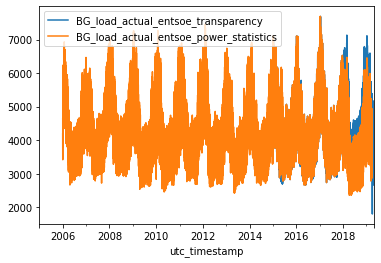

In [37]:
data_frame[['BG_load_actual_entsoe_transparency','BG_load_actual_entsoe_power_statistics']].plot()

In [ ]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(len(data_frame.columns[:]), figsize=(20,3*len(data_frame.columns[:3])))
# fig.suptitle('Vertically stacked subplots')
k = 0
for i in data_frame.columns[:]:
    data_frame[str(i)].plot(ax=axes[k])
    axes[k].set_title(str(i))
    k+=1
# data_frame['BE_solar_generation_actual'].plot()
plt.show()